In [1]:
#importing modules
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from ipywidgets.widgets import interact, FloatSlider, Layout, IntSlider
%matplotlib inline

# SIRH model: healthcare workers added to SIR model

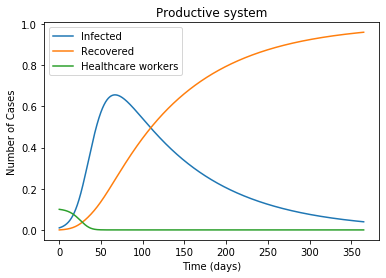

In [243]:
#dynamics of a SIRH model

#model definition
def modSIRH(y,t,N,k):
    #assignments
    S=N-sum(y[0:2])
    dy=[0]*3

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
    v1=k[1]*(y[0]/N) #k1*I
    v2=(1-k[2])*(y[0]/N)*(y[2]/N) #(1-PPE)*I*H
    v3=k[3]*k[4]*(y[0]/N)*(y[2]/N) #k3*Vent*I*H

    #ODEs
    dy[0]=N*(v0+v2-v1-v3) #I
    dy[1]=N*(v1+v3) #R
    dy[2]=N*(-v2) #H

    return dy

##parameters
k=np.zeros(5)
k[0]=0.1 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.5 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.01 #infected
ic[1]=0 #recovered
ic[2]=0.1 #healthcare workers
##timeline
tmax=1*365 #days
#tmax=60 #days
tvec=np.arange(0,tmax,0.1)

soln=odeint(modSIRH,ic,tvec,args=(N,k))
#plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
plt.plot(tvec,soln)

legend_labels = ('Infected','Recovered','Healthcare workers')
plt.xlabel("Time (days)")
plt.title("Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

# SIRDH model: considering patient deaths and re-infections

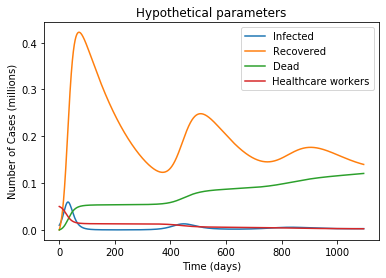

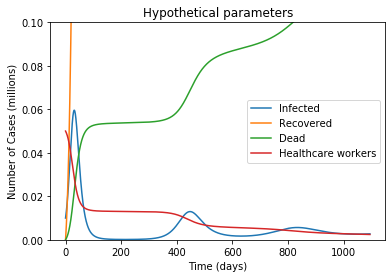

In [251]:
#dynamics of a SIRDH model

#model definition
def modSIRDH(y,t,N,k):
    #assignments
    S=N-sum(y[0:3])
    dy=[0]*4

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
    v1=k[1]*(y[0]/N) #k1*I
    v2=k[2]*(y[0]/N) #k2*I
    v3=k[3]*(y[1]/N) #k3*R
    v4=(1-k[4])*(y[0]/N)*(y[3]/N) #(1-PPE)*I*H
    v5=k[5]*k[6]*(y[0]/N)*(y[3]/N) #k3*Vent*I*H

    #ODEs
    dy[0]=N*(v0+v4-v1-v2-v5) #I
    dy[1]=N*(v1+v5-v3) #R
    dy[2]=N*(v2) #D
    dy[3]=N*(-v4) #H

    return dy

##parameters
k=np.zeros(7)
k[0]=0.3 #infection rate
k[1]=0.2 #recovery rate
k[2]=0.02 #death rate
k[3]=0.005 #re-infection rate
k[4]=0.5 #PPE fraction
k[5]= 0.7 #recovery rate with treatment
k[6]=0.2 #ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(4)
ic[0]=0.01 #infected
ic[1]=0 #recovered
ic[2]=0 #dead
ic[3]=0.05 #healthcare workers
##timeline
tmax=3*365 #days
#tmax=60 #days
tvec=np.arange(0,tmax,0.1)

soln=odeint(modSIRDH,ic,tvec,args=(N,k))
plt.plot(tvec,soln)

legend_labels = ('Infected','Recovered','Dead','Healthcare workers')
plt.xlabel("Time (days)")
plt.title("Hypothetical parameters")
plt.ylabel("Number of Cases (millions)")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

#plotVar=0
#plt.plot(tvec,[i[plotVar] for i in soln],'b-',linewidth=lw)
plt.plot(tvec,soln)
legend_labels = ('Infected','Recovered','Dead','Healthcare workers')
plt.xlabel("Time (days)")
plt.title("Hypothetical parameters")
plt.ylabel("Number of Cases (millions)")
plt.legend(legend_labels)
plt.ylim([0,0.1])
plt.show()

# SEI<sub>1</sub>I<sub>2</sub>RDH: considering mild and severe symptom patients

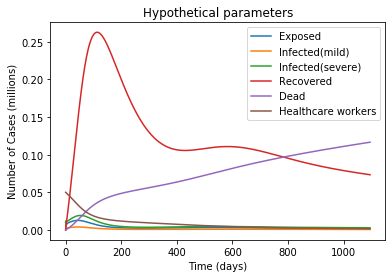

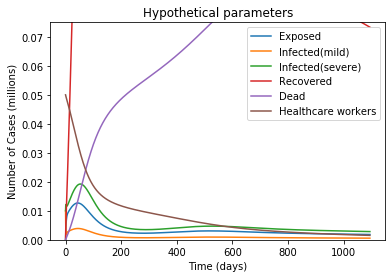

In [253]:
#dynamics of a SEIIRDH model

#model definition
def modSEIIRDH(y,t,N,k):
    #assignments
    S=N-sum(y[0:5])
    dy=[0]*6

    #reaction rates
    v0=k[0]*(S/N)*(y[1]/N) #k0*S*I1
    v1=k[1]*(S/N)*(y[2]/N) #k1*S*I2
    v2=k[2]*(y[0]/N) #k2*E
    v3=k[3]*(y[1]/N) #k3*I1
    v4=k[4]*(y[1]/N) #k4*I1
    v5=k[5]*(y[2]/N) #k5*I2
    v6=k[6]*(y[2]/N) #k6*I2
    v7=k[7]*(y[3]/N) #k7*R
    v8=(1-k[8])*(y[1]/N)*(y[5]/N) #(1-PPE)*I1*H
    v9=(1-k[8])*(y[2]/N)*(y[5]/N) #(1-PPE)*I2*H
    v10=k[9]*k[10]*(y[1]/N)*(y[5]/N) #k9*Vent*I1*H
    v11=k[11]*k[10]*(y[2]/N)*(y[5]/N) #k11*Vent*I2*H
    
    #ODEs
    dy[0]=N*(v0+v1+v8+v9-v2-v10-v11) #E
    dy[1]=N*(v2-v3-v4) #I1
    dy[2]=N*(v3-v5-v6) #I2
    dy[3]=N*(v4+v5+v10+v11-v7) #R
    dy[4]=N*(v6) #D
    dy[5]=N*(-v8-v9) #H

    return dy

##parameters
k=np.zeros(12)
k[0]=0.1 #infection rate from mild cases
k[1]=0.3 #infection rate from severe cases
k[2]=0.4 #progression rate from exposed to mild symptoms
k[3]=0.6 #progression rate from mild to severe symptoms
k[4]=0.7 #natural recovery rate for mild cases
k[5]= 0.1 #natural recovery rate for severe cases
k[6]=0.02 #death rate
k[7]=0.01 #re-infection rate
k[8]=0.5 #PPE fraction
k[9]=0.7 #recovery rate for mild cases with treatment
k[10]=0.5 #ventilator fraction
k[11]=0.4 #recovery rate for severe cases with treatment
N=1 #population count
##Initial conditions
ic=np.zeros(6)
ic[0]-0 #exposed
ic[1]=0.01 #infected mild case
ic[2]=0.01 #infected severe case
ic[3]=0 #recovered
ic[4]=0 #dead
ic[5]=0.05 #healthcare workers
##timeline
tmax=3*365 #days
#tmax=60 #days
tvec=np.arange(0,tmax,0.1)

soln=odeint(modSEIIRDH,ic,tvec,args=(N,k))
plt.plot(tvec,soln)

legend_labels = ('Exposed','Infected(mild)','Infected(severe)','Recovered','Dead','Healthcare workers')
plt.xlabel("Time (days)")
plt.title("Hypothetical parameters")
plt.ylabel("Number of Cases (millions)")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

#plt.plot(tvec,[i[1]+i[2] for i in soln],'b-',linewidth=lw)
#legend_labels = ('Infected(mild)+Infected(severe)','Infected(mild)','Infected(severe)','Recovered','Dead','Healthcare workers')
plt.plot(tvec,soln)
legend_labels = ('Exposed','Infected(mild)','Infected(severe)','Recovered','Dead','Healthcare workers')
plt.xlabel("Time (days)")
plt.title("Hypothetical parameters")
plt.ylabel("Number of Cases (millions)")
plt.legend(legend_labels)
plt.ylim([0,0.075])
plt.show()